In [2]:
from random import randint, sample, random, shuffle, choice
from math import log, floor
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg
import heapq
import networkx as nx
import matplotlib.pyplot as plt

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\krige\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [3]:
# class to implement node of RB Tree
class RBNode:
        # cnostructor
    def __init__(self, value, color='red'):
        self.value = value
        self.color = color
        self.left = None
        self.right = None
        self.parent = None
        self.lst = []

    # function to get the grandparent of node
    def grandparent(self):
        if self.parent is None:
            return None
        return self.parent.parent

    # function to get the sibling of node
    def sibling(self):
        if self.parent is None:
            return None
        if self == self.parent.left:
            return self.parent.right
        return self.parent.left

    # function to get the uncle of node
    def uncle(self):
        if self.parent is None:
            return None
        return self.parent.sibling()

# function to implement Red Black Tree


class RedBlackTree:
        # constructor to initialize the RB tree
    def __init__(self):
        self.root = None

    # function to search a value in RB Tree
    def search(self, value):
        curr_node = self.root
        while curr_node is not None:
            if value == curr_node.value:
                return curr_node
            elif value < curr_node.value:
                curr_node = curr_node.left
            else:
                curr_node = curr_node.right
        return None

    # function to insert a node in RB Tree, similar to BST insertion
    def insert(self, value):
        # Regular insertion
        new_node = RBNode(value)
        if self.root is None:
            self.root = new_node
        else:
            curr_node = self.root
            while True:
                if value < curr_node.value:
                    if curr_node.left is None:
                        curr_node.left = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.left
                else:
                    if curr_node.right is None:
                        curr_node.right = new_node
                        new_node.parent = curr_node
                        break
                    else:
                        curr_node = curr_node.right
        self.insert_fix(new_node)

    # Function to fix RB tree properties after insertion
    def insert_fix(self, new_node):
        while new_node.parent and new_node.parent.color == 'red':
            if new_node.parent == new_node.grandparent().left:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.right:
                        new_node = new_node.parent
                        self.rotate_left(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_right(new_node.grandparent())
            else:
                uncle = new_node.uncle()
                if uncle and uncle.color == 'red':
                    new_node.parent.color = 'black'
                    uncle.color = 'black'
                    new_node.grandparent().color = 'red'
                    new_node = new_node.grandparent()
                else:
                    if new_node == new_node.parent.left:
                        new_node = new_node.parent
                        self.rotate_right(new_node)
                    new_node.parent.color = 'black'
                    new_node.grandparent().color = 'red'
                    self.rotate_left(new_node.grandparent())
        self.root.color = 'black'

    # Function for left rotation of RB Tree
    def rotate_left(self, node):
        right_child = node.right
        node.right = right_child.left

        if right_child.left is not None:
            right_child.left.parent = node

        right_child.parent = node.parent

        if node.parent is None:
            self.root = right_child
        elif node == node.parent.left:
            node.parent.left = right_child
        else:
            node.parent.right = right_child

        right_child.left = node
        node.parent = right_child

    # function for right rotation of RB Tree
    def rotate_right(self, node):
        left_child = node.left
        node.left = left_child.right

        if left_child.right is not None:
            left_child.right.parent = node

        left_child.parent = node.parent

        if node.parent is None:
            self.root = left_child
        elif node == node.parent.right:
            node.parent.right = left_child
        else:
            node.parent.left = left_child

        left_child.right = node
        node.parent = left_child

In [4]:
def flagTermBigger(terms, base, flag1, flag2):
    flag12 = terms[flag1] + '*' + terms[flag2]
    flag21 = terms[flag2] + '*' + terms[flag1]
    superscriptMap = {2: '²', 3: '³', 4: '⁴', 5: '⁵', 6: '⁶', 7: '⁷', 8: '⁸'}
    exponent = flag1 + flag2 - 6
    if base == 2: #log(n)
        if flag1 == 2:
            if flag2 == 2:
                return True, 'log(n)²'
            else:
                return True, flag12
    elif base == 3: #√n
        if flag1 == 2:
            if flag2 >= 4:
                return True, flag21
    elif base == 4: #n
        if flag1 == 2:
            if flag2 >= 4:
                return True, flag21
        elif flag1 == 4:
            if flag2 in [2, 3, 8]:
                return True, flag12
            elif flag2 in [4, 5, 6, 7]:
                return True, 'n' + superscriptMap[exponent]
    elif base == 5: #n^2
        if flag1 == 2:
            if flag2 >= 5:
                return True, flag21
        elif flag1 in [4, 5]:
            if flag1 == 5 and flag2 in [2, 3]:
                return True, flag12
            elif flag2 in [4, 5, 6, 7]:
                return True, 'n' + superscriptMap[exponent]
            elif flag2 == 8:
                return True, flag12
    elif base == 6: #n^3
        if flag1 == 2:
            if flag2 >=6:
                return True, flag21
        elif flag1 in [4, 5, 6]:
            if flag1 == 6 and flag2 in [2, 3]:
                return True, flag12
            elif flag2 in [4, 5, 6, 7]:
                if exponent > 3:
                    return True, 'n' + superscriptMap[exponent]
            elif flag2 == 8:
                return True, flag12
    elif base == 7: #n^4
        if flag1 == 2:
            if flag2 >=7:
                return True, flag21
        elif flag1 in [4, 5, 6, 7]:
            if flag1 == 7 and flag2 in [2, 3]:
                return True, flag12
            elif flag2 in [4, 5, 6, 7]:
                if exponent > 4:
                    return True, 'n' + superscriptMap[exponent]
            elif flag2 == 8:
                return True, flag12
    return False, 0

In [5]:
def timeComplexity(): #something about n*n4 and so on
    terms = ['/n!', '', 'log(n)', '√n', 'n', 'n²', 'n³', 'n⁴', '*2ⁿ']
    numberOfTerms = randint(2, 4)
    frontFactors = sample(range(1, 50), numberOfTerms)
    termsWithN = sample(range(len(terms)-1), numberOfTerms)
    extraTerm = randint(2, 7)
    whereToPutExtraTerm = randint(0, numberOfTerms)
    timeFunction = 'T(n) = '
    flag = -1
    for i in range(numberOfTerms):
        timeFunction += str(frontFactors[i])
        timeFunction += terms[termsWithN[i]]
        if i == whereToPutExtraTerm and termsWithN[i] not in [0, 1, 3, 8]:
            timeFunction += '*'
            timeFunction += terms[extraTerm]
            flag = i
        if i < numberOfTerms - 1:
            timeFunction += ' + '

    idxCorrectAnswer = max(termsWithN)
    if idxCorrectAnswer == 1:
        correctAnswer = '1'
    elif idxCorrectAnswer == 8:
        correctAnswer = '2ⁿ'
    else:
        correctAnswer = terms[idxCorrectAnswer]
    
    if flag != -1:
        if flagTermBigger(terms, idxCorrectAnswer, termsWithN[flag], extraTerm)[0]:
            correctAnswer = flagTermBigger(terms, idxCorrectAnswer, termsWithN[flag], extraTerm)[1]

    print('Given the following time function T(n), indicate the time complexity in Big-Oh notation.')
    print('If more than one function is correct, choose the one with the slowest growth rate.')
    print(timeFunction)
    answer = 'O({})'.format(correctAnswer)
    return answer

In [6]:
def masterTheorem():
    a = randint(1, 5)
    b = randint(2, 5)
    k = randint(0, 2)

    if a < b**k:
        if k == 0:
            answer = 'O(1)'
        elif k == 1:
            answer = 'O(n)'
        else:
            answer = 'O(n²)'
    elif a == b**k:
        if k == 0:
            answer = 'O(log(n))'
        elif k == 1:
            answer = 'O(n*log(n))'
        else:
            answer = 'O(n²*log(n))'
    elif a > b**k:
        exponent = log(a, b)
        if exponent == 1:
            answer = 'O(n)'
        elif exponent == 0.5:
            answer = 'O(√n)'
        elif exponent == 2:
            answer = 'O(n²)'
        elif exponent == int(exponent) or 2*exponent == int(2*exponent):
            answer = 'O(n^{})'.format(exponent)
        else:
            answer = 'O(n^log{}({}))'.format(b, a)
        
   
    print('Given the following time function T(n), indicate the time complexity in Big-Oh notation.')
    print('If more than one function is correct, choose the one with the slowest growth rate.')
    p = randint(2, 5)
    if k == 0:
        print('T(n) = {} * T(n/{}) + {}'.format(a, b, p))
    elif k == 1:
        print('T(n) = {} * T(n/{}) + {}n'.format(a, b, p))
    else:
        print('T(n) = {} * T(n/{}) + {}n²'.format(a, b, p))
    return answer

In [7]:
def huffmanCoding():
    moby = set(nltk.Text(gutenberg.words('melville-moby_dick.txt')))
    moby = [word.upper() for word in moby if len(word) > 5 and len(word) < 9]
    while True:
        try:
            answer = moby[int(random()*len(set(moby)))]
            letters = list(set(answer))
            assert len(letters) == 5
            break
        except AssertionError:
            pass
    bitMap = {letters[0]: '00', letters[1]: '01', letters[2]: '10', letters[3]: '110', letters[4]: '111'}
    huffmanCode = ''
    for letter in answer:
        huffmanCode += bitMap[letter]
    print('Using the Huffman tree below, decode the bit string {} and indicate the corresponding word.'.format(huffmanCode))
    print('')
    print('        .')
    print('      /   \\ ')
    print('     .     .')
    print('    / \\   / \\ ')
    print('   {}   {} {}   .'.format(letters[0], letters[1], letters[2]))
    print('            / \\ ')
    print('           {}   {}'.format(letters[3], letters[4]))
    return answer

In [8]:
def heapInsertion():
    numbers = list(set(sample(range(1, 50), 8)))
    print('Insert into an initially empty min-heap the following numbers in the following order:')
    print(*numbers, sep=", ")
    print('Indicate the correct array representation of the resulting min-heap.')
    heapq.heapify(numbers)
    return numbers

In [9]:
def radixSort():
    numbers = []
    for i in range(4):
        numbers.append('')
        for j in range(4):
            numbers[i] += str(randint(0, 4))
    for i in range(4, 6):
        numbers.append('')
        idx = randint(0, 3)
        for j in range(2):
            numbers[i] += str(randint(0, 4))
        numbers[i] += numbers[idx][2:]

    shuffle(numbers)

    print('Consider the following list of numbers:')
    print([int(number) for number in numbers])
    print('We sort the list using RadixSort.')
    print('Indicate the partially sorted list after the numbers have been sorted by the two least significant digits.')

    for i in range(3, 1, -1):
        lst = []
        for j in range(6):
            lst.append(int(numbers[j][i]))
        order = sorted(list(range(len(lst))), key=lambda i: lst[i])
        numbers = [numbers[i] for i in order]

    return [int(number) for number in numbers]

In [10]:
def bucketSort():
    numbers = []
    k = randint(5, 8)
    M = k*100 - 1
    numbers.append(M)
    for i in range(k-1):
        numbers.append(randint(0, M))
    shuffle(numbers)
    buckets = [[] for _ in range(k)]
    for i in range(k):
        buckets[floor(k*numbers[i]/(M+1))].append(numbers[i])

    print('Consider the following list of numbers:')
    print(numbers)
    print('We sort the list using BucketSort with k = {}.'.format(k))
    print('How does the array buckets look after inserting elements into it, but before using InsertionSort?')

    answer = ''
    for i in range(k):
        answer += '['
        if buckets[i]:
            for j in range(len(buckets[i]) - 1):
                answer += str(buckets[i][j]) + '] --> ['
            answer += str(buckets[i][-1])
        answer += ']\n'
    return answer

In [11]:
def heapExtractMin():
    numbers = list(set(sample(range(1, 50), 8)))
    heapq.heapify(numbers)
    howManyTimes = randint(2,3)
    print('Consider the following heap, represented as an array:')
    print(numbers)
    print('Indicate the array representation of the heap after removing the minimum element {} times.'.format(howManyTimes))
    for _ in range(howManyTimes):
        heapq.heappop(numbers)
    return numbers

In [12]:
def simpleBucketSort():
    potentialMax = randint(10, 14)
    sampleAmount = randint(6, 9)
    numbers = list(set(sample(range(0, potentialMax), sampleAmount)))
    shuffle(numbers)
    M = max(numbers)
    buckets = [0 for _ in range(M+1)]
    for i in range(len(numbers)):
        buckets[numbers[i]] = 1

    print('Consider the following list of numbers:')
    print(numbers)
    print('We sort the list using SimpleBucketSort.')
    print('How does the array buckets look after executing the algorithm?')

    return buckets

In [13]:
def redBlackInsert():
    numbers = list(set(sample(range(1, 20), 8)))
    shuffle(numbers)
    print('Insert the following numbers into an initially empty red-black tree in the following order:')
    print(*numbers, sep = ', ')
    tree = RedBlackTree()
    for number in numbers:
        tree.insert(number)
    print('After inserting all elements, what is the root of the tree?')
    return tree.root.value

In [14]:
def createGraph():
    G = nx.Graph()
    G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F', 'G'])

    possible_weights = set(range(1, 20)) - {6,8,9}
    edges_with_weights = []
    for node in G:
        weight = choice(list(possible_weights))
        possible_weights -= {weight}
        if node == 'G':
            break
        neighbor = chr(ord(node) + 1)
        edges_with_weights.append((node, neighbor, weight))

    for i in range(5):
        weight = choice(list(possible_weights))
        possible_weights -= {weight}
        nodes = [node for node in G]
        node1 = choice(nodes)
        node2 = choice(list(set(nodes) - {node1}))
        if not G.has_edge(node1, node2) and node1 != node2:
            edges_with_weights.append((node1, node2, weight))
        
    G.add_weighted_edges_from(edges_with_weights)
    return G

In [15]:
def drawGraph(G):
    pos = nx.circular_layout(G)  # Layout for the graph
    plt.figure(figsize=(4, 3))
    nx.draw(
        G, pos, with_labels=True, node_color="lightgreen", node_size=800, 
        edge_color="gray", font_size=15
    )
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)
    plt.show()

In [16]:
def dijkstra():
    G = createGraph()
    print('Consider the following weighted graph:')
    drawGraph(G)
    print('Indicate the order in which the vertices are visited (declared "known") when running Dijkstras algorithm starting from vertex A.')
    print('Assume that adjacency lists are sorted alphabetically.')

    #dijkstra
    source = 'A'
    distances = {node: float("inf") for node in G}
    distances[source] = 0  # Set the source value to 0

    pq = [(0, source)]
    heapq.heapify(pq)

    visited = []
    while pq:  # While the priority queue isn't empty
       current_distance, current_node = heapq.heappop(pq)

       if current_node in visited:
           continue 
       visited.append(current_node)
    
       for neighbor in sorted(G.neighbors(current_node)):
           weight = G[current_node][neighbor]['weight']
           # Calculate the distance from current_node to the neighbor
           tentative_distance = current_distance + weight
           if tentative_distance < distances[neighbor]:
               distances[neighbor] = tentative_distance
               heapq.heappush(pq, (tentative_distance, neighbor))

    return visited

In [17]:
def prim():
    G = createGraph()
    print('Consider the following weighted graph:')
    drawGraph(G)
    print('Indicate the order in which the edges are added to the MST when running Prim\'s algorithm starting from vertex A.')

    #prim
    source = 'A'
    distances = {node: float("inf") for node in G}
    distances[source] = 0  # Set the source value to 0

    pq = [(0, source, None)]
    heapq.heapify(pq)

    visited = []
    mst = []
    while pq:  # While the priority queue isn't empty
        current_distance, current_node, parent = heapq.heappop(pq)

        if current_node in visited:
            continue 
        visited.append(current_node)
        if parent != None:
            mst.append((parent, current_node))
    
        for neighbor in sorted(G.neighbors(current_node)):
            weight = G[current_node][neighbor]['weight']
            if weight < distances[neighbor]:
                distances[neighbor] = weight
                heapq.heappush(pq, (weight, neighbor, current_node))

    return mst

In [18]:
def find(parent, node):
    if parent[node] != node:
        parent[node] = find(parent, parent[node])  # Path compression
    return parent[node]

def union(parent, rank, node1, node2):
    root1 = find(parent, node1)
    root2 = find(parent, node2)
    
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        elif rank[root1] < rank[root2]:
            parent[root1] = root2
        else:
            parent[root2] = root1
            rank[root1] += 1

def kruskal():
    G = createGraph()
    print('Consider the following weighted graph:')
    drawGraph(G)
    print('Indicate the order in which the edges are added to the MST when running Kruskal\'s algorithm.')

    sorted_edges = sorted(G.edges(data=True), key=lambda edge: edge[2]['weight'])
    parent = {node: node for node in G.nodes}
    rank = {node: 0 for node in G.nodes}

    mst = []

    for edge in sorted_edges:
        u, v, data = edge
        if find(parent, u) != find(parent, v):
            union(parent, rank, u, v)
            mst.append((u, v))
            
    return mst

In [19]:
def buildHuffmanTree():
    wordsWithFewUniqueLetters = ['ACACIA', 'ADDLED', 'ARREAR', 'ASSETS', 'ASSIST', 'ATTEST', 'BABBLE', 'BAOBAB', 'BASSES', 'BEETLE', 'BEEVES', 
                                 'BOBBED', 'BOBBIN', 'BOBBLE', 'BUBBLE', 'CABALA', 'CESSES', 'DEEMED', 'DIDDLE', 'ELEVEN', 'EXCEED', 'FEEBLE', 
                                 'FEELER', 'FEELIE', 'FESSES', 'FLUFFY', 'GAGGLE', 'GIGGLE', 'GOGGLE', 'GROGGY', 'HEELER', 'HORROR', 'JEEVES', 
                                 'JESSES', 'KABALA', 'KAMALA', 'KANARA', 'LASSES', 'LEASEE', 'LOSSES', 'MASSES', 'MESSES', 'MISSES', 'MOSSES', 
                                 'MUMMER', 'NESSES', 'OBSESS', 'OOLOGY', 'OOLONG', 'PAPPUS', 'PASSES', 'PEEKED', 'PEEKER', 'PEELED', 'PEELER', 
                                 'PEEPED', 'PEEPER', 'PEERIE', 'PEPPER', 'POPPER', 'RECEDE', 'REEVES', 'REHEEL', 'REVERE', 'ROCOCO', 'SASHES', 
                                 'SECEDE', 'SEEMED', 'SENSES', 'SERENE', 'SEVERE', 'SYZYGY', 'TATTLE', 'TEEMED', 'TEETER', 'TEETHE', 'TERROR', 
                                 'TESSES', 'TITTLE', 'TOSSES', 'TOTTER', 'DEEDED', 'ESSENES', 'FEOFFEE', 'MESEEMS', 'ENTENTE', 'ASSISTS', 
                                 'DIDDLED', 'GAGGING', 'POSSESS', 'BOOTHOOK', 'KALAAZAR', 'MASSLESS', 'SCISSORS', 'ASSASSIN', 'BIZZBUZZ', 'COOKBOOK', 
                                 'EXCEEDED', 'LOSSLESS', 'PEETWEET', 'REHEELER', 'REVERSEE', 'STRESSES', 'REDEEDED', 'ASSESSES',
                                 'SLEEPLESS', 'SEVENTEEN', 'UNCUNNING', 'SENSELESS', 'BEEKEEPER', 'POSSESSES', 'BUBBLEBATH', 'INHIBITION', 
                                 'VISIBILITY', 'STRESSLESS', 'HUBBLEBUBBLE', 'LOSSLESSNESS', 'SENSELESSNESS', 'INDIVISIBILITY']
    #source = https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fwww.puzzlemuseum.com%2Fsingma%2Fsingma5%2FLANGUAGE%2FWORDCURI.DOC&wdOrigin=BROWSELINK
    word = choice(wordsWithFewUniqueLetters)
    print('Build a Huffman tree to optimally compress the word {}. How many bits are in the encoded bit string?'.format(word))

    letters = dict()
    for letter in word:
        freq = word.count(letter)
        letters[letter] = freq
    freqs = letters.copy()
    
    bitLength = dict()
    for letter in letters:
        bitLength[letter] = 1

    while letters:
        node1 = min(letters, key = letters.get)
        freq1 = letters[node1]
        del letters[node1]
        node2 = min(letters, key = letters.get)
        freq2 = letters[node2]
        del letters[node2]
        if letters:
            letters[node1 + node2] = freq1 + freq2
            for letter in node1 + node2:
                bitLength[letter] += 1
                
    return sum(freqs[k]*bitLength[k] for k in freqs)

In [20]:
def flowNetwork():
    G = nx.DiGraph()
    G.add_nodes_from(['t', 'b', 'a', 's', 'c', 'd'])

    options = [1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19,20]
    
    edges_with_weights = []
    for n in ['a','c']:
        edges_with_weights.append(('s', n, choice(options)))
    for n in ['b','d']:
        edges_with_weights.append((n, 't', choice(options)))
    edges_with_weights.append(('a', 'b', choice(options)))
    edges_with_weights.append(('c', 'd', choice(options)))

    crossWeight = choice(options)
    possible_edges = [('a', 'c', choice(options)),
                      ('c', 'a', choice(options)), 
                      ('a', 'd', crossWeight),
                      ('d', 'a', crossWeight),
                      ('b', 'c', crossWeight),
                      ('c', 'b', crossWeight),
                      ('b', 'd', choice(options)),
                      ('d', 'b', choice(options))]

    choices = sample(list(range(4)), 2)
    offset = sample(list(range(2)), 2)
    for i in range(2):
        edges_with_weights.append(possible_edges[2*choices[i]+offset[i]])
    G.add_weighted_edges_from(edges_with_weights)
    print('Consider the following flow network, where s is the source and t is the sink.')
    drawGraph(G)
    print('Use the Edmonds-Karp algorithm to find the maximum flow from s to t.')
    print('Assume that the adjacency lists are sorted alphabetically.')
    print('What is the maximum flow?')

    for u, v, data in G.edges(data=True):
        data['capacity'] = data['weight']

    flow = nx.maximum_flow(G, 's', 't')
    return flow[0]

In [21]:
def validRedBlack():
    while True:
        try: 
            numbers = list(set(sample(range(10, 80), 9)))
            assert len(numbers) == 9
            tree = RedBlackTree()
            for number in numbers:
                tree.insert(number)
            assert tree.root.left.left != None
            assert tree.root.left.right != None
            assert tree.root.right.left != None
            assert tree.root.right.right != None
            break
        except AssertionError:
            pass
    
    leaves = [tree.root.left.left.left,tree.root.left.left.right,
        tree.root.left.right.left,tree.root.left.right.right,
        tree.root.right.left.left,tree.root.right.left.right,
        tree.root.right.right.left,tree.root.right.right.right]

    leafPositions = [leaf.value if leaf != None else '  ' for leaf in leaves]
    dashes = []
    for i in range(len(leaves)):
        if leaves[i] != None:
            if i % 2 == 0:
                dashes.append('/')
            else:
                dashes.append('\\')
        else:
            dashes.append(' ')
            
        
    print('Consider the following binary search tree:')
    print('              {}'.format(tree.root.value))
    print('          /        \\')
    print('        {}          {}'.format(tree.root.left.value,tree.root.right.value))
    print('      /    \\      /    \\')
    print('    {}     {}    {}    {}'.format(tree.root.left.left.value,tree.root.left.right.value,tree.root.right.left.value,tree.root.right.right.value))
    print('   {} {}    {} {}   {} {}    {} {}'.format(*dashes))
    print('  {} {}  {} {} {} {}  {} {}'.format(*leafPositions))

    colorMap = [[tree.root.value, tree.root.color],
                [tree.root.left.value, tree.root.left.color],
                [tree.root.right.value, tree.root.right.color],
                [tree.root.left.left.value, tree.root.left.left.color],
                [tree.root.left.right.value, tree.root.left.right.color],
                [tree.root.right.left.value, tree.root.right.left.color],
                [tree.root.right.right.value, tree.root.right.right.color]]
    for leaf in leaves:
        if leaf != None:
            colorMap.append([leaf.value, leaf.color])

    answer = 'Yes'

    dice = random()
    if dice < 1/6:
        index = randint(0,8)
        if colorMap[index][1] == 'black':
            colorMap[index][1] = 'red'
        else:
            colorMap[index][1] = 'black'
        answer = 'No'
    elif dice < 1/2:
        for i in range(7):
            colorMap[i][1] = 'black'
        for i in range(7,9):
            colorMap[i][1] = 'red'
        if dice < 1/3:
            colorMap[0][1] = 'red'
            answer = 'No'
    elif dice < 2/3:
        for i in range(3):
            colorMap[i][1] = 'black'
        for i in range(3,9):
            colorMap[i][1] = 'red'
            answer = 'No'

    print('Is the tree a valid red-black tree if the nodes are colored as follows:')
    blacks = []
    reds = []
    for node in colorMap:
        if node[1] == 'black':
            blacks.append(node[0])
        else:
            reds.append(node[0])
    print('Red: {}. Black: {}'.format(sorted(reds), sorted(blacks)))
    
    return answer

In [131]:
def generateRandomAssignment():
    possibleAssignments = [timeComplexity, masterTheorem, huffmanCoding, heapInsertion, radixSort, 
                           bucketSort, heapExtractMin, simpleBucketSort, redBlackInsert, dijkstra, 
                           prim, kruskal, buildHuffmanTree, flowNetwork, validRedBlack]
    randomNumber = randint(0, len(possibleAssignments) - 1)
    return possibleAssignments[randomNumber]()

In [190]:
answer = generateRandomAssignment()

Build a Huffman tree to optimally compress the word ASSESSES. How many bits are in the encoded bit string?


In [175]:
print(answer)

O(n²)


In [25]:
redBlackInsert()

Insert the following numbers into an initially empty red-black tree in the following order:
9, 18, 4, 10, 17, 6, 12, 11
After inserting all elements, what is the root of the tree?


9

Consider the following flow network, where s is the source and t is the sink.


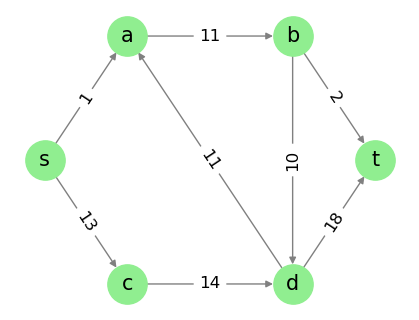

Use the Edmonds-Karp algorithm to find the maximum flow from s to t.
Assume that the adjacency lists are sorted alphabetically.
What is the maximum flow?


14

In [36]:
flowNetwork()